YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0090 - val_loss: 9.1946e-04
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 5.9763e-04 - val_loss: 8.0457e-04
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 5.1215e-04 - val_loss: 0.0011
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 4.8703e-04 - val_loss: 8.5960e-04
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 3.7505e-04 - val_loss: 6.4211e-04
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 4.1832e-04 - val_loss: 6.2530e-04
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 4.6624e-04 - val_loss: 8.7733e-04
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 3.6064e-04 - val_loss: 6.1777e-04
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 3.2421e-04 - val_loss: 7.5236e-04
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 3.6561e-04 - val_loss: 8.1419e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


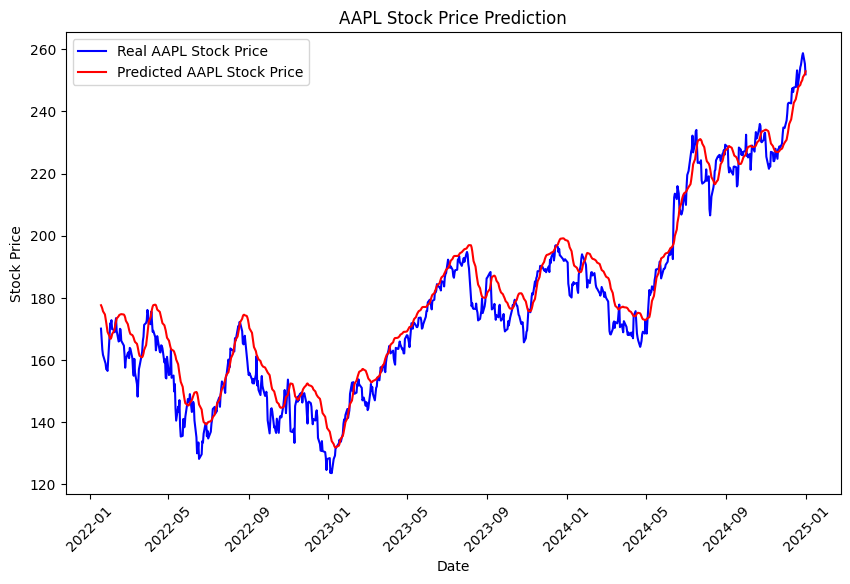

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


ticker_symbol = "AAPL"
stock_data = yf.download(ticker_symbol, start="2010-01-01", end="2025-01-01")


stock_data = stock_data[['Close']]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)


def create_dataset(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

time_step = 60
x_data, y_data = create_dataset(scaled_data)


x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)


model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


test_dates = stock_data.index[-len(y_test):]


plt.figure(figsize=(10, 6))
plt.plot(test_dates, real_stock_price, color='blue', label=f'Real {ticker_symbol} Stock Price')
plt.plot(test_dates, predicted_stock_price, color='red', label=f'Predicted {ticker_symbol} Stock Price')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()


plt.xticks(rotation=45)
plt.show()


model.save('stock_price_forecasting_model.h5')
